## The Sparks Foundation Task1 : Prediction using Supervised ML

## GRIP (Graduate Rotational Internship Program)

### Name : Pradyum Soni

### Domain : Data Science & Business Analytics

### Problem Statement

#### Prediction using Supervised ML. Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("Downloads\The Sparks Foundation\Data.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

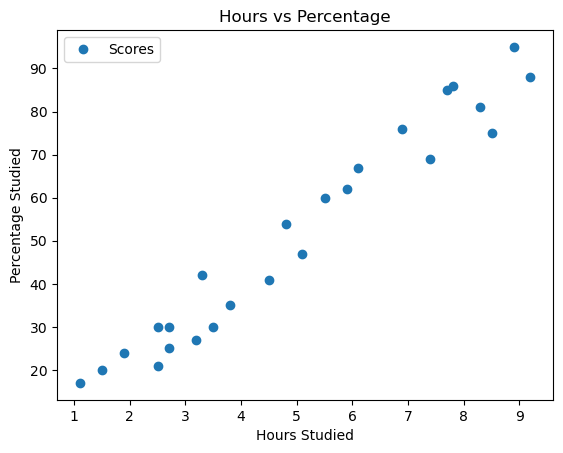

In [3]:
# Plotting the distribution of data
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Studied')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print('Training Complete')

Training Complete


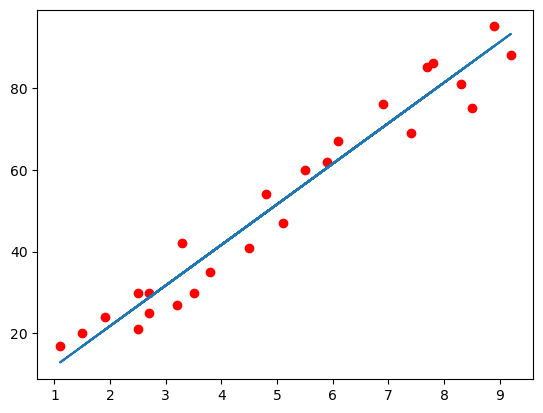

In [7]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y, color = 'Red')
plt.plot(x, line);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(x_test) # Testing the data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing the Actual vs Predict
df_1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
regressor.score(x_test, y_test)

0.9454906892105356

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Hence, the predicted score if a student studies for 9.25 hrs/day is 93.69.

### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [12]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error : 4.183859899002975
